<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [2]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [9]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [10]:
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


Check for missing/null values in the three dataframes

In [7]:
# Your Work Here
cell_phones.isnull().sum()
population.isnull().sum()
geo_country_codes.isnull().sum()

#no missing values in the three dataframes

geo        0
country    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

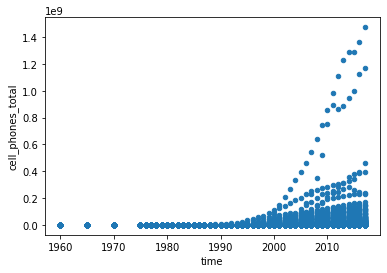

In [8]:
# Your Work Here

cell_phones.plot.scatter('time', 'cell_phones_total');

Data Wrangling Section 1
Filter the cell_phones dataframe to only include information about the USA and China and then remake the scatterplot.


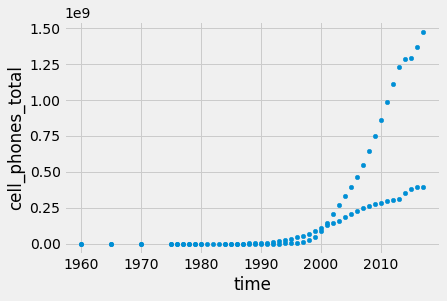

In [189]:
cell_phones.head()

us_and_china = (cell_phones['geo']== 'usa') | (cell_phones['geo']== 'chn')

cell_phones[us_and_china].head(10)

cell_phones[us_and_china].plot.scatter('time', 'cell_phones_total')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [21]:
# Your Work Here

cell_population = pd.merge(cell_phones, population, how='inner', on=('geo','time'))

print(cell_population.shape)
cell_population.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [32]:
geo_country_codes['geo'].head()

geo_country_codes['country'].head()


smaller_geoframe = geo_country_codes[['geo','country']]


smaller_geoframe.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [37]:
# Your Work Here

alltheframes=pd.merge(smaller_geoframe, cell_population, how='inner', on='geo')

print(alltheframes.shape)

alltheframes.head()

(8590, 5)


,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996351
1,afg,Afghanistan,1965,0.0,9938414
2,afg,Afghanistan,1970,0.0,11126123
3,afg,Afghanistan,1975,0.0,12590286
4,afg,Afghanistan,1976,0.0,12840299


Data Wrangling Section 2
Explain why we are using an "inner" join when we merge these dataframes.

We're using an 'inner' join because we're merging two dataframes that have the same values in the 'geo' and 'country' columns. There are no NaN values in these dataframes so 'inner' will not lose any data. If we had NaN values that we wanted to keep, we might use a 'outer' join, for example.


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [49]:
# Your Work Here 


phone_per_person = alltheframes['cell_phones_total']/alltheframes['population_total']

phone_per_person.tail()


even_more_frames = pd.concat([alltheframes, phone_per_person], axis=1)

print(even_more_frames.shape)
even_more_frames.tail()

#I have a complete dataframe but I could still need to rename the 'phone per person' column, but I'm moving on for now



(8590, 6)


,geo,country,time,cell_phones_total,population_total,0
8585,zwe,Zimbabwe,2013,13633167.0,15054506,0.905587
8586,zwe,Zimbabwe,2014,11798652.0,15411675,0.765566
8587,zwe,Zimbabwe,2015,12757410.0,15777451,0.808585
8588,zwe,Zimbabwe,2016,12878926.0,16150362,0.797439
8589,zwe,Zimbabwe,2017,14092104.0,16529904,0.852522


In [59]:

#This is my test

condition = ((alltheframes['country']=='United States') & (alltheframes['time']==2017))

even_more_frames[condition]

#There are 1.220 phones per person in 2017, it worked!


,geo,country,time,cell_phones_total,population_total,0
8134,usa,United States,2017,395881000.0,324459463,1.220125


Data Wrangling Section 3
Modify the geo column to make the geo codes uppercase instead of lowercase.


In [193]:
even_more_frames['geo'].str.upper()

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
8585    ZWE
8586    ZWE
8587    ZWE
8588    ZWE
8589    ZWE
Name: geo, Length: 8590, dtype: object

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [85]:
# Your Work Here
print(even_more_frames.dtypes)

print(even_more_frames.describe())

print(even_more_frames['time'].min())
print(even_more_frames['time'].max())
#time period indeed ranges from 1960 to 2017

print(even_more_frames['country'].nunique())
even_more_frames['geo'].nunique()
#there are indeed 195 countries

geo                   object
country               object
time                   int64
cell_phones_total    float64
population_total       int64
0                    float64
dtype: object
              time  cell_phones_total  population_total            0
count  8590.000000       8.590000e+03      8.590000e+03  8590.000000
mean   1994.193481       9.004950e+06      2.983823e+07     0.279639
std      14.257975       5.573408e+07      1.161284e+08     0.454247
min    1960.000000       0.000000e+00      4.433000e+03     0.000000
25%    1983.000000       0.000000e+00      1.456148e+06     0.000000
50%    1995.000000       6.200000e+03      5.725062e+06     0.001564
75%    2006.000000       1.697652e+06      1.810581e+07     0.461149
max    2017.000000       1.474097e+09      1.409517e+09     2.490243
1960
2017
195


195

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [92]:
# Your Work Here

phones_in_2017 = even_more_frames['time']==2017

even_more_frames[phones_in_2017].sort_values('cell_phones_total', ascending=False).head(5)

#Why do Indonesians need 1.7 phones per person??

,geo,country,time,cell_phones_total,population_total,0
1496,chn,China,2017,1.474097e+09,1409517397,1.045817
3595,ind,India,2017,1.168902e+09,1339180127,0.872849
3549,idn,Indonesia,2017,4.589232e+08,263991379,1.738402
8134,usa,United States,2017,3.958810e+08,324459463,1.220125
1084,bra,Brazil,2017,2.364885e+08,209288278,1.129966


Data Wrangling Section 4
2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [205]:
too_many_phones_condition = even_more_frames['population_total'] <= even_more_frames['cell_phones_total']

american_excess = even_more_frames[too_many_phones_condition]

sorted_americans = american_excess['geo']=='usa'

american_excess[sorted_americans]

##2014 was the first year that the USA had more phones than people

,geo,country,time,cell_phones_total,population_total,0
8131,usa,United States,2014,355500000.0,317718779,1.118914
8132,usa,United States,2015,382307000.0,319929162,1.194974
8133,usa,United States,2016,395881000.0,322179605,1.228759
8134,usa,United States,2017,395881000.0,324459463,1.220125


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



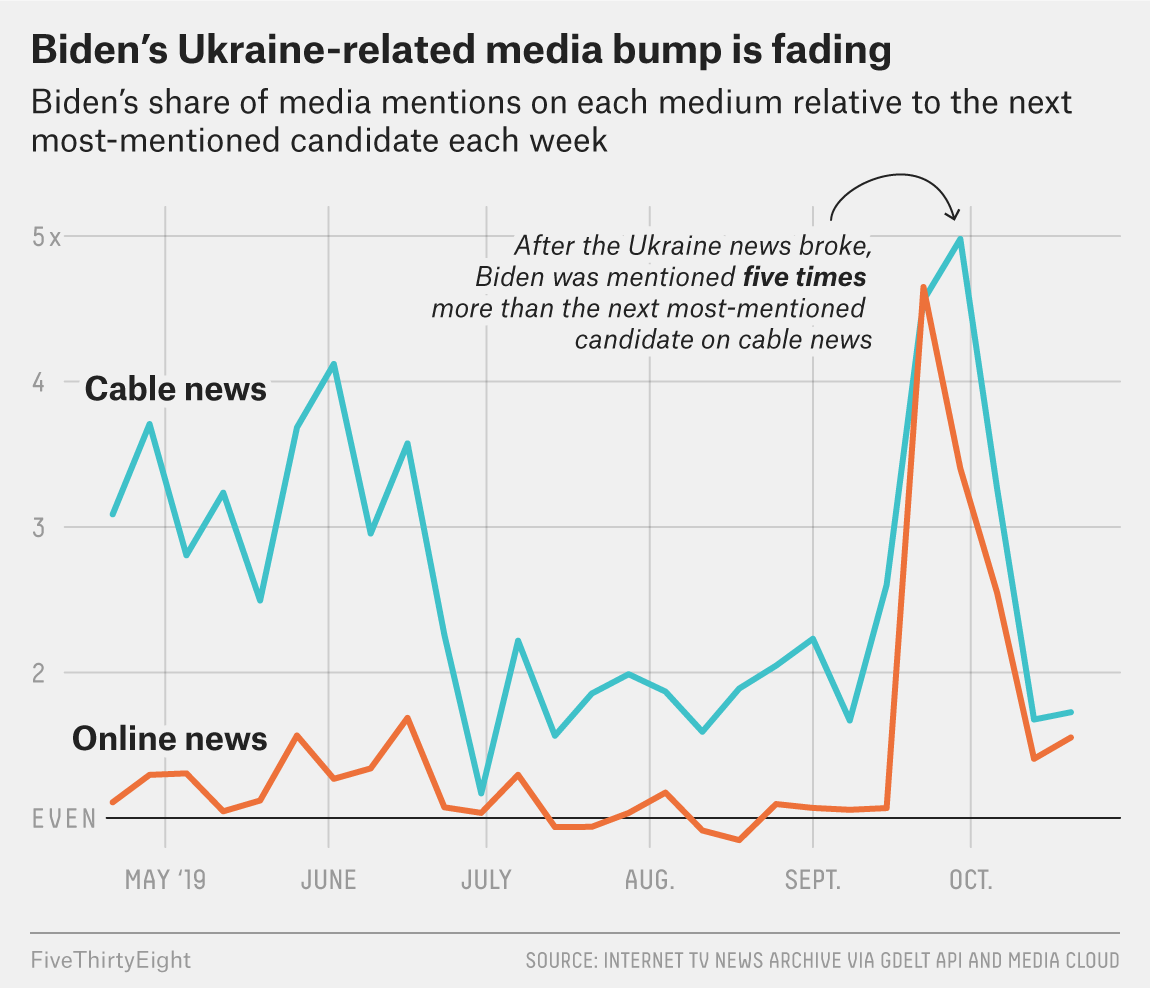

In [94]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [0]:
# Your Work Here

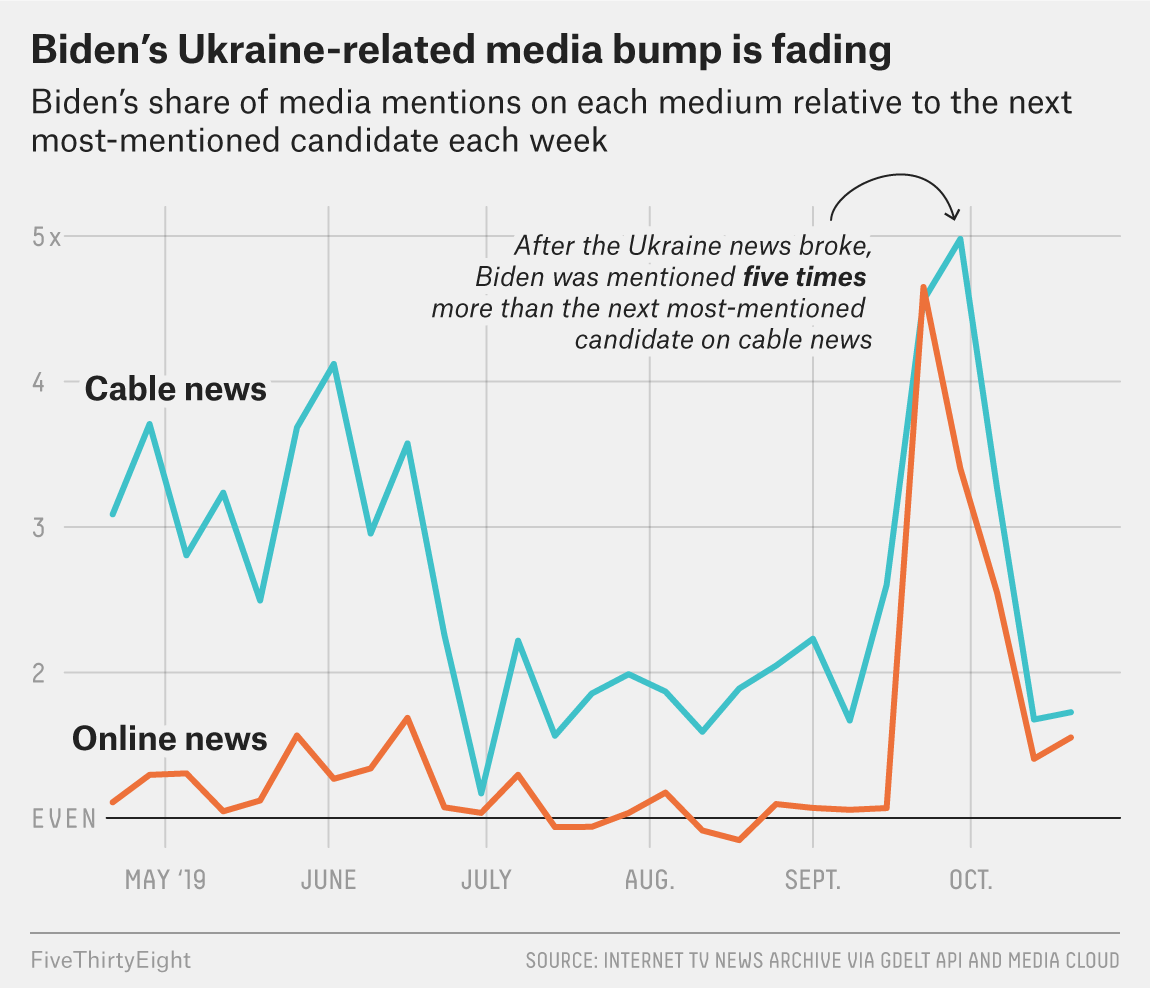

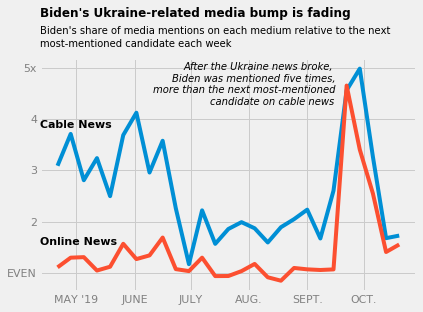

In [260]:
#using 538 stylesheet
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots();

ax.plot(data_for_graph);


ax.set_title("Biden's Ukraine-related media bump is fading",
             loc='left',
             color='black',
             fontsize=12,
             fontweight='bold',
             x=0,
             y=1.15)

##subtitle
plt.text(0,1.105, "Biden's share of media mentions on each medium relative to the next", fontsize=10, transform=ax.transAxes)
plt.text(0,1.05, "most-mentioned candidate each week", fontsize=10, transform=ax.transAxes)

###line labels
plt.text(0,.2, "Online News", fontsize=11, fontweight='bold', transform=ax.transAxes)
plt.text(0,.7, "Cable News", fontsize=11, fontweight='bold', transform=ax.transAxes)

##comment on the peak of the chart
plt.text(.38,.95, "After the Ukraine news broke,", fontsize=10, style='italic', transform=ax.transAxes)
plt.text(.35,.90, "Biden was mentioned five times,", fontsize=10, style='italic', transform=ax.transAxes)
plt.text(.30,.85, "more than the next most-mentioned", fontsize=10, style='italic', transform=ax.transAxes)
plt.text(.45,.80, "candidate on cable news", fontsize=10, style='italic', transform=ax.transAxes)

# y axis labels
ax.set_yticklabels(labels=["EVEN", "2", "3", "4", "5x"], color='gray', fontsize='11')
ax.set_yticks(ticks=range(1,6,1))

# x axis labels
ax.set_xticklabels(labels=["MAY '19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."], color='gray', fontsize='11')


### trying to make the x axis prettier
#ax.set_xlabel('Date', color='Black', fontsize=12, fontweight='bold')
#ax.set_xticks(ticks=range(0,7,1))



display(example)


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.
